In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **NF = Numerical Feautures**                  
## **DF = Discrete Feautures**
## **CF = Continuous Feautures**
## **Cf = Categorical Feautures**
## **a = Feautures**
## **AOC = Accuracy of Models**

## **Importing Libraries**

In [2]:
AP = []
MN = []

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
!pip install catboost

     |████████████████████████████████| 69.2MB 44kB/s 


## **Algorithm Used ==>**
## **SVM = Support Vector Machine**
## **DT = DecisionTreeClassifier**
## **LR = Logistic Regression**
## **KNN = KNeighborsClassifier**
## **CB = Cat Boost Classifier**
## **GNB = Gaussian Naive bayes Classifier**
## **XGB = XGBoost Classifier**
## **RF = Random Forest Classifier**

In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [7]:
pwd

'/content'

In [8]:
DF0 = pd.read_csv("/content/drive/MyDrive/Data Science Project /Crop Prediction Dataset.zip (Unzipped Files)/Crop_recommendation.csv")

## **Data Analysis**

In [9]:
DF0.head(n=11)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [10]:
NF = [a for a in DF0.columns if DF0[a].dtypes != 'O']
print("Numerical Features Count {}".format(len(NF)))

Numerical Features Count 7


In [11]:
print(NF)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


# **Missing Values**

In [12]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

## **Random Sampling to Handle Numerical Feautures**

In [13]:
def RandomSamplingImputation(DF0, variable):
    DF0[variable]=DF0[variable]
    random_sample=DF0[variable].dropna().sample(DF0[variable].isnull().sum(),random_state=0)
    random_sample.index=DF0[DF0[variable].isnull()].index
    DF0.loc[DF0[variable].isnull(),variable]=random_sample

In [14]:
DF = [a for a in NF if len(DF0[a].unique())<25]
CF = [a for a in NF if a not in DF]

In [15]:
print(DF)

[]


In [16]:
print(CF)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


## **Handle Missing Values in Continuous Features**

In [17]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [18]:
for a in CF:
    if(DF0[a].isnull().sum()*100/len(DF0))>0:
        DF0[a] =DF0[a].fillna(DF0[a].median())

In [19]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

## **Handle Missing Values in Discrete Feautures**

In [20]:
def Mode_Nan(DF0,variable):
    mode=DF0[variable].value_counts().index[0]
    DF0[variable].fillna(mode,inplace=True)

In [21]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [22]:
Cf = [a for a in DF0.columns if a not in NF]

In [23]:
print(Cf)

['label']


## **Checking Outliers Using Box Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

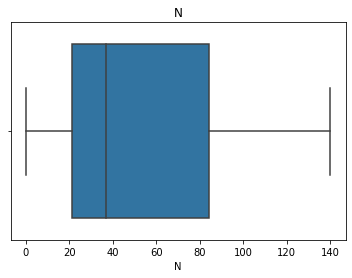

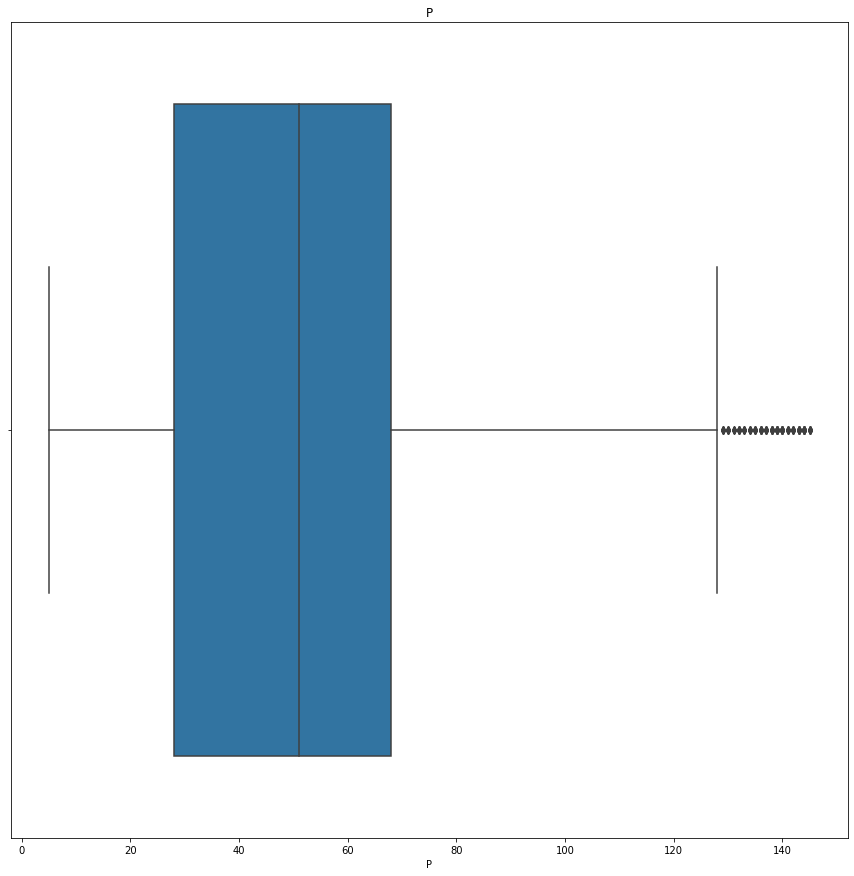

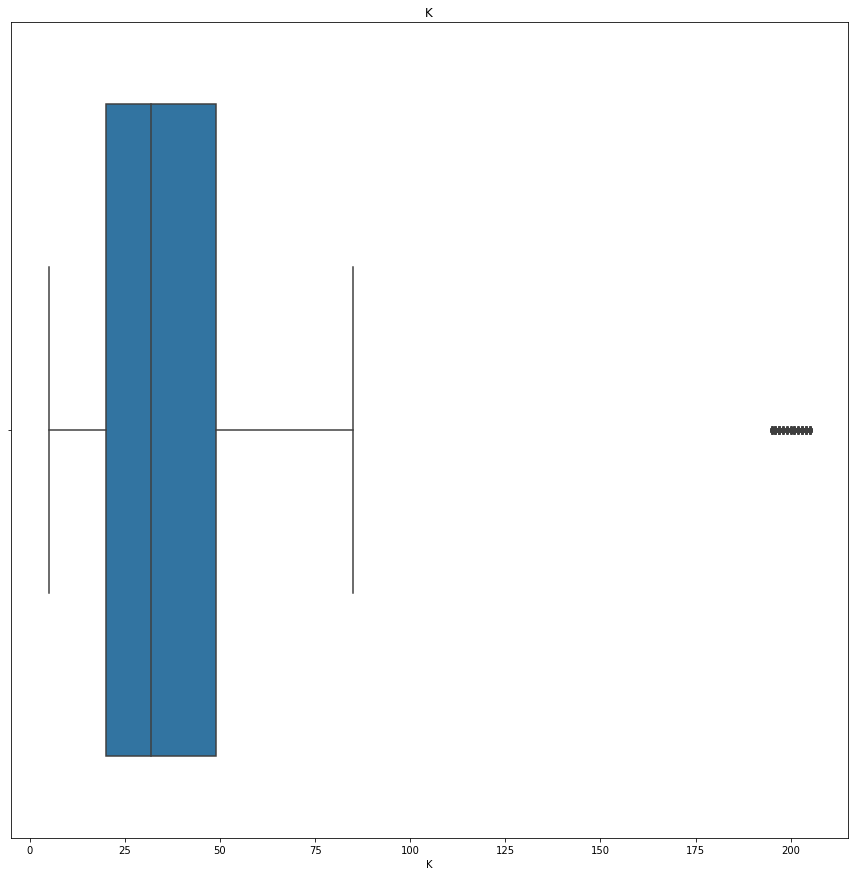

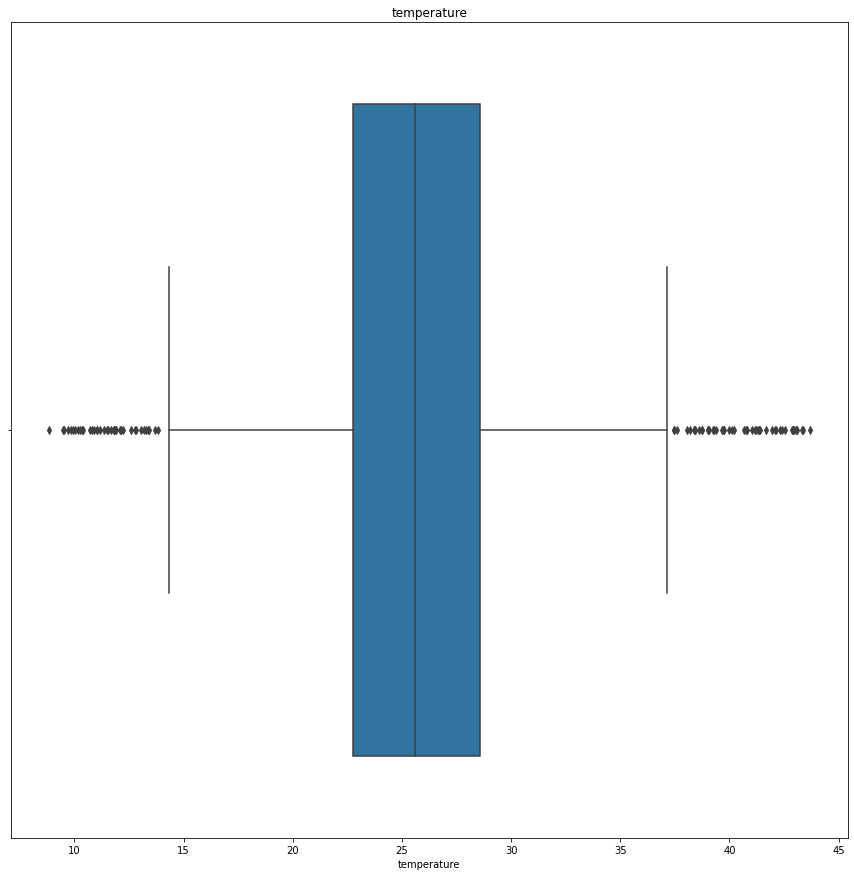

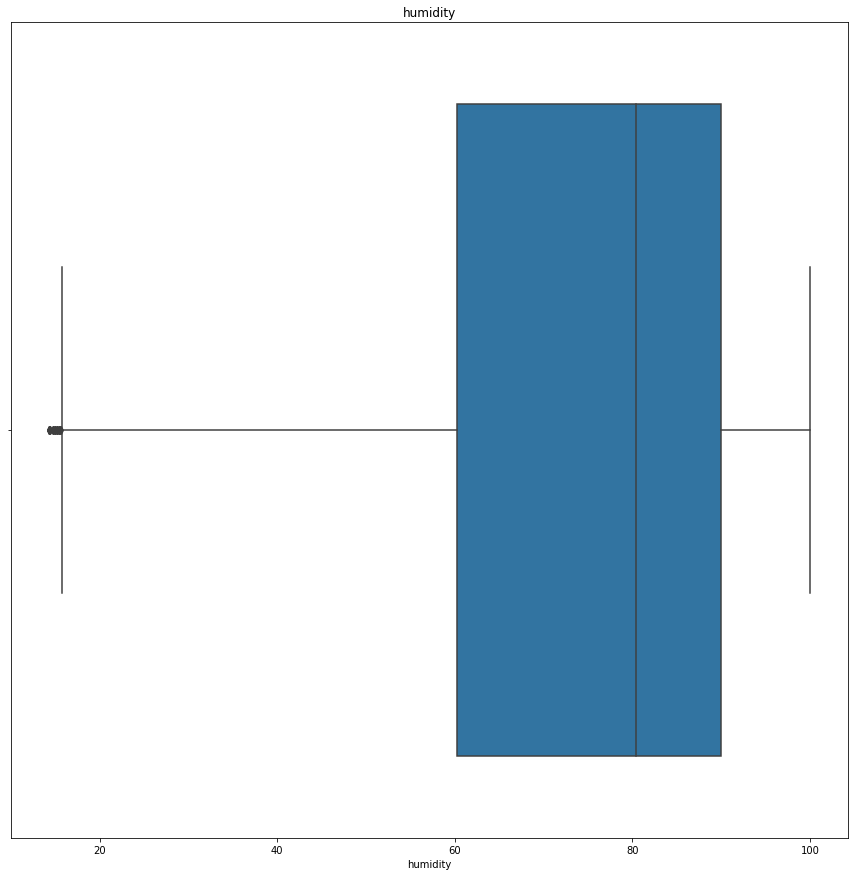

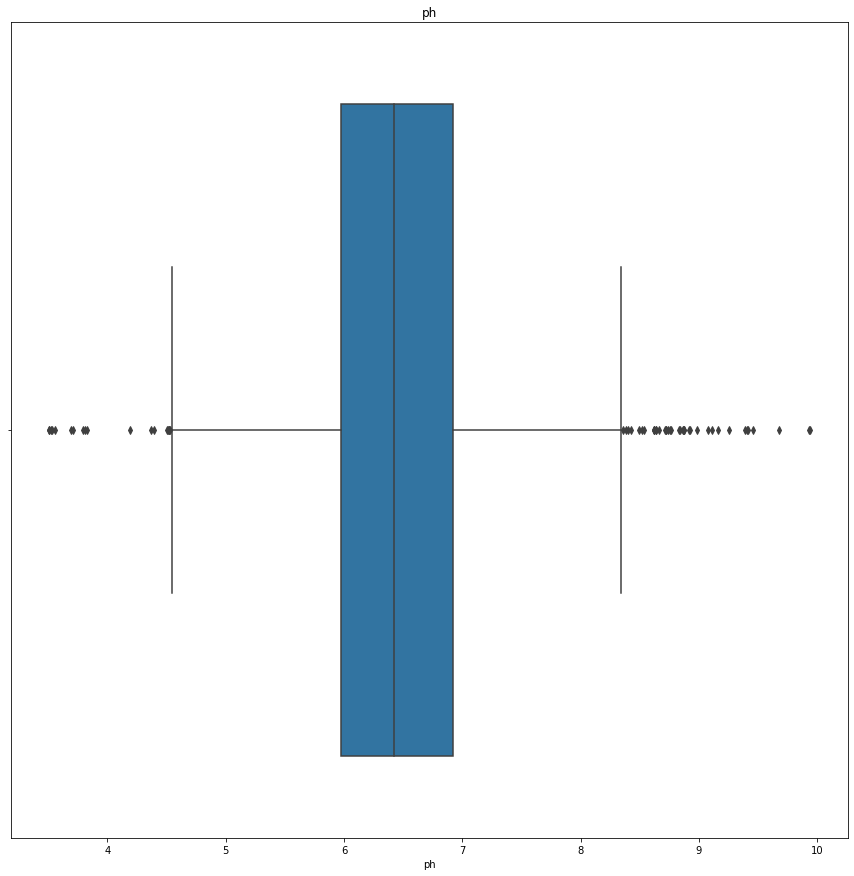

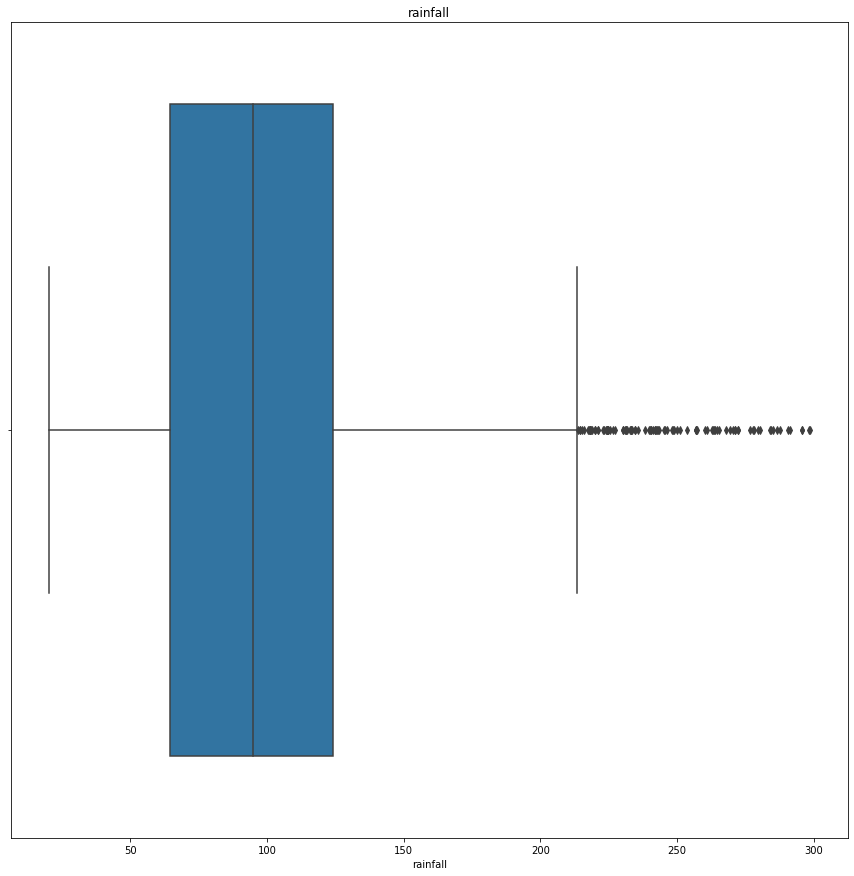

<Figure size 1080x1080 with 0 Axes>

In [24]:
for a in CF:
    data=DF0.copy()
    sns.boxplot(data[a])
    plt.title(a)
    plt.figure(figsize=(15,15))

In [25]:
DF0.tail(n=11)

,N,P,K,temperature,humidity,ph,rainfall,label
2189,99,16,30,23.526521,65.443409,6.392792,186.172820,coffee
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [26]:
DF0.isnull().sum()*100/len(DF0)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

## **Unique Values**

In [27]:
DF0['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## **Unique Value Counts**

In [28]:
DF0['label'].value_counts()

lentil         100
blackgram      100
orange         100
coffee         100
coconut        100
banana         100
chickpea       100
kidneybeans    100
papaya         100
rice           100
mungbean       100
pomegranate    100
watermelon     100
mango          100
muskmelon      100
apple          100
cotton         100
maize          100
grapes         100
jute           100
pigeonpeas     100
mothbeans      100
Name: label, dtype: int64

## **Data Visualization**

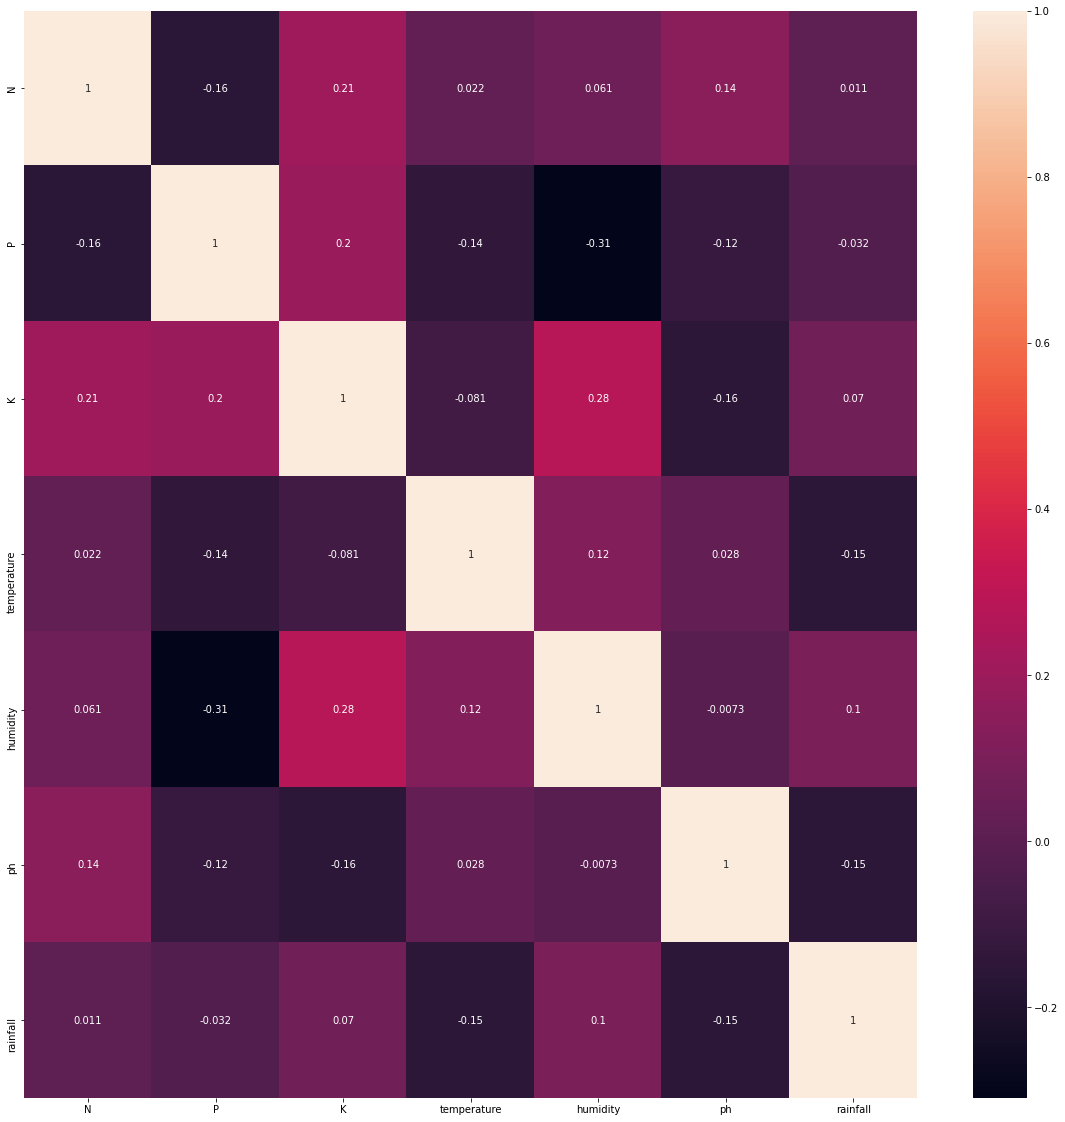

In [29]:
corrmat = DF0.corr(method = "spearman")
plt.figure(figsize=(20,20))
b=sns.heatmap(corrmat,annot=True)

## **Dist Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


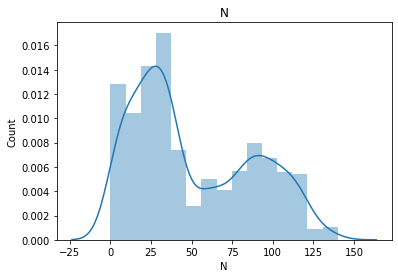

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


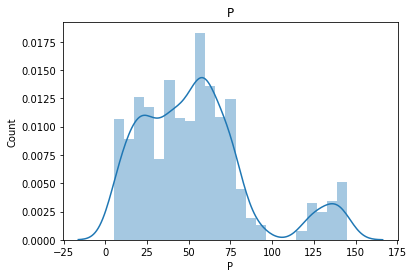

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


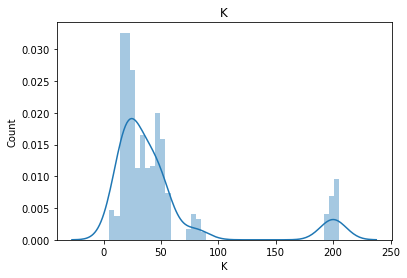

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


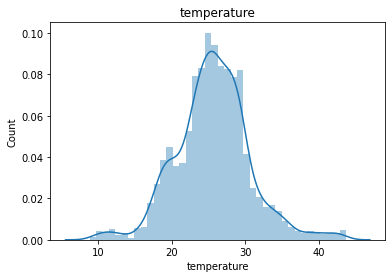

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


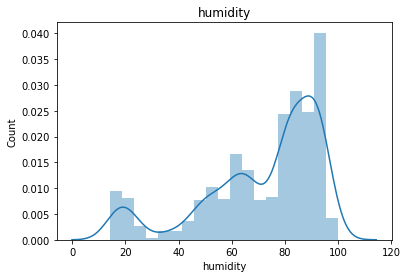

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


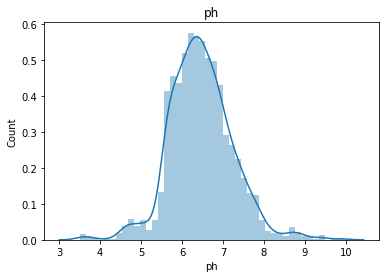

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


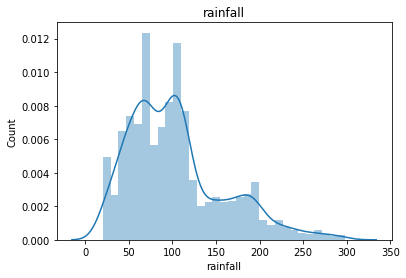

<Figure size 1080x1080 with 0 Axes>

In [30]:
for a in CF:
    data=DF0.copy()
    sns.distplot(DF0[a])
    plt.xlabel(a)
    plt.ylabel("Count")
    plt.title(a)
    plt.figure(figsize=(15,15))
    plt.show()

## **Box Plot for all Continuous Feauture**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

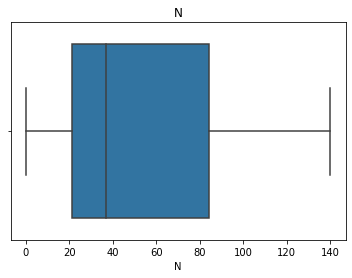

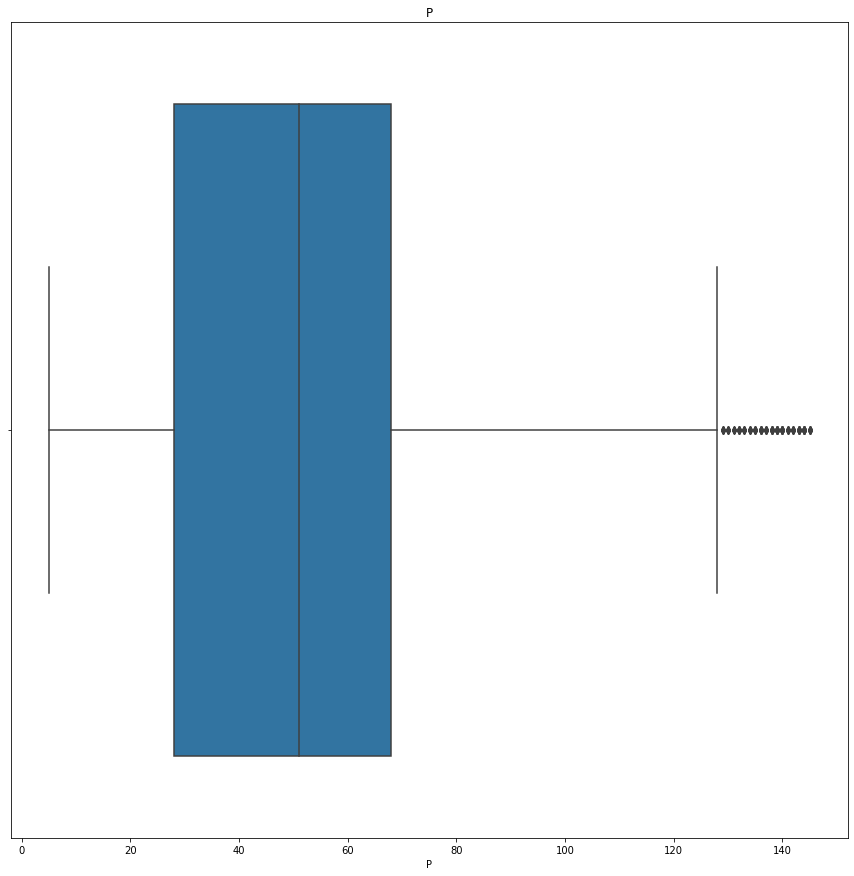

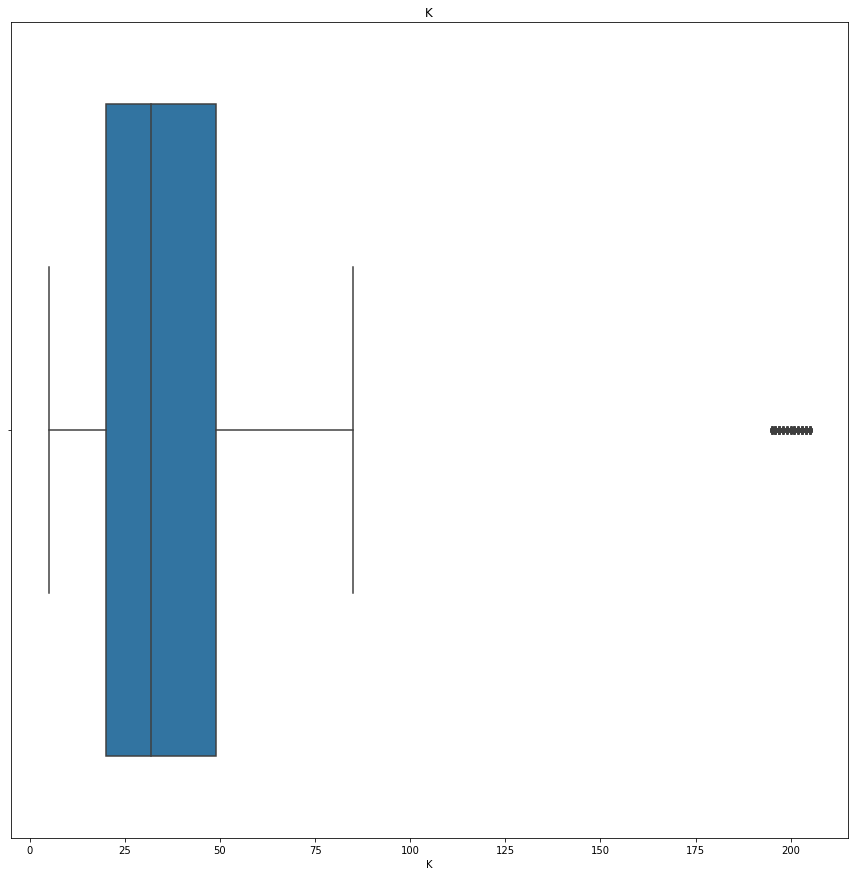

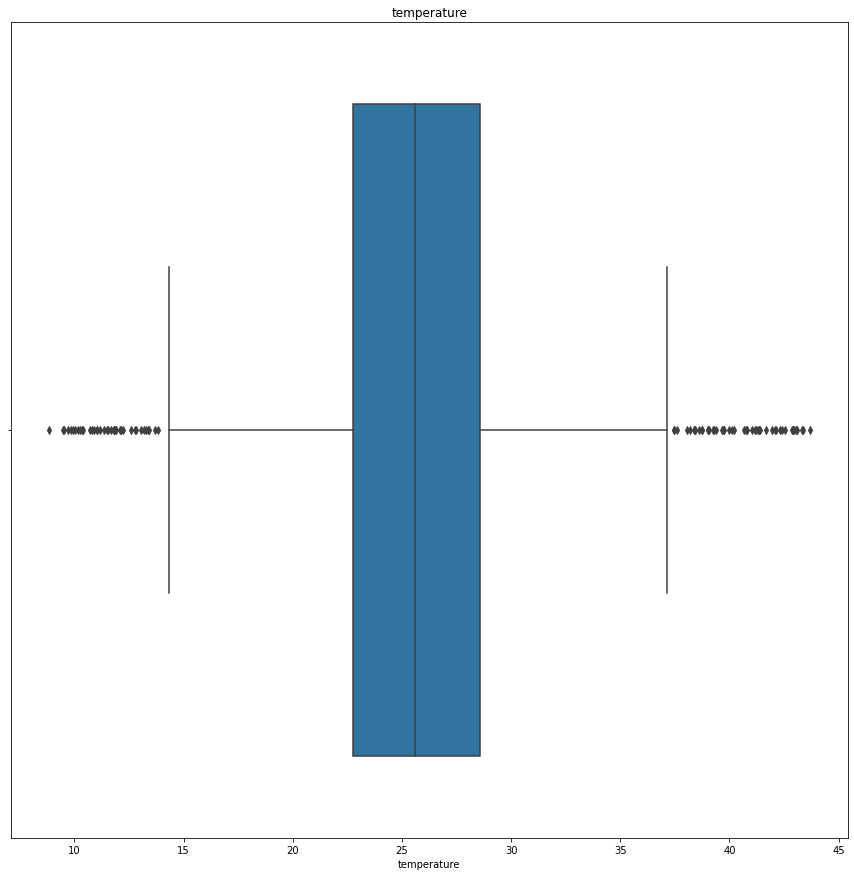

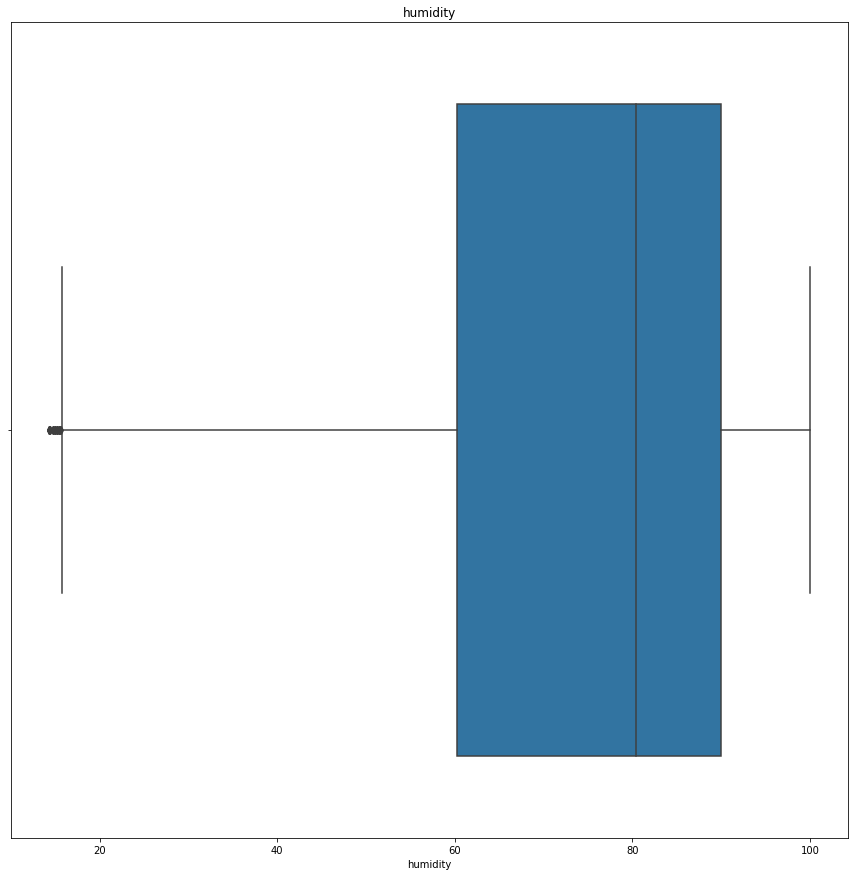

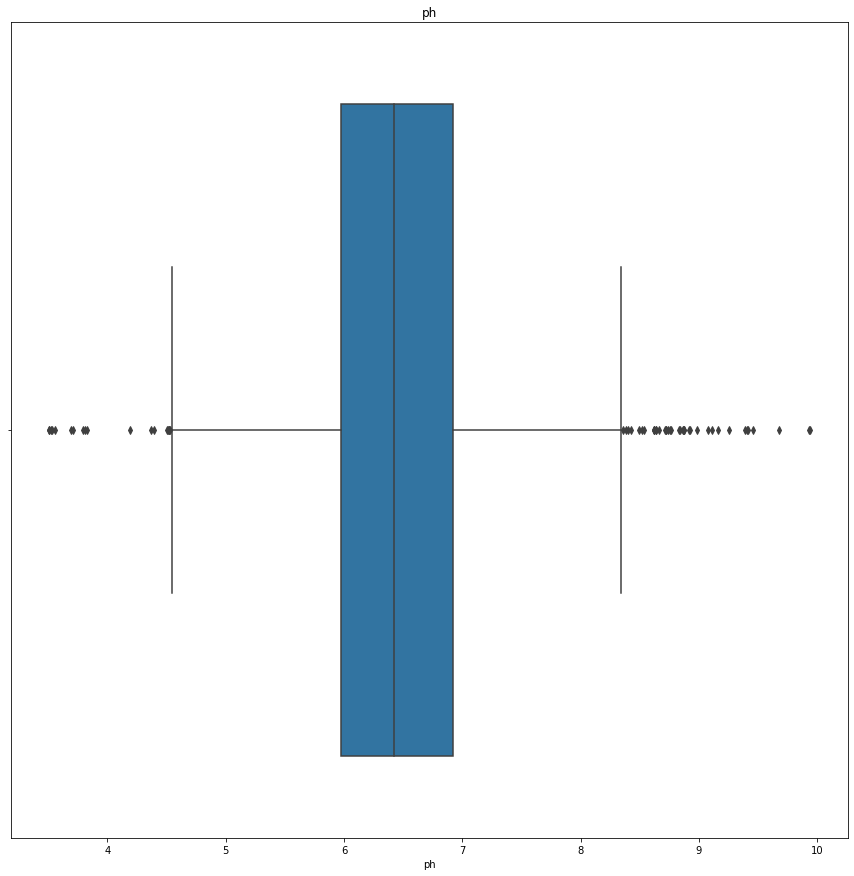

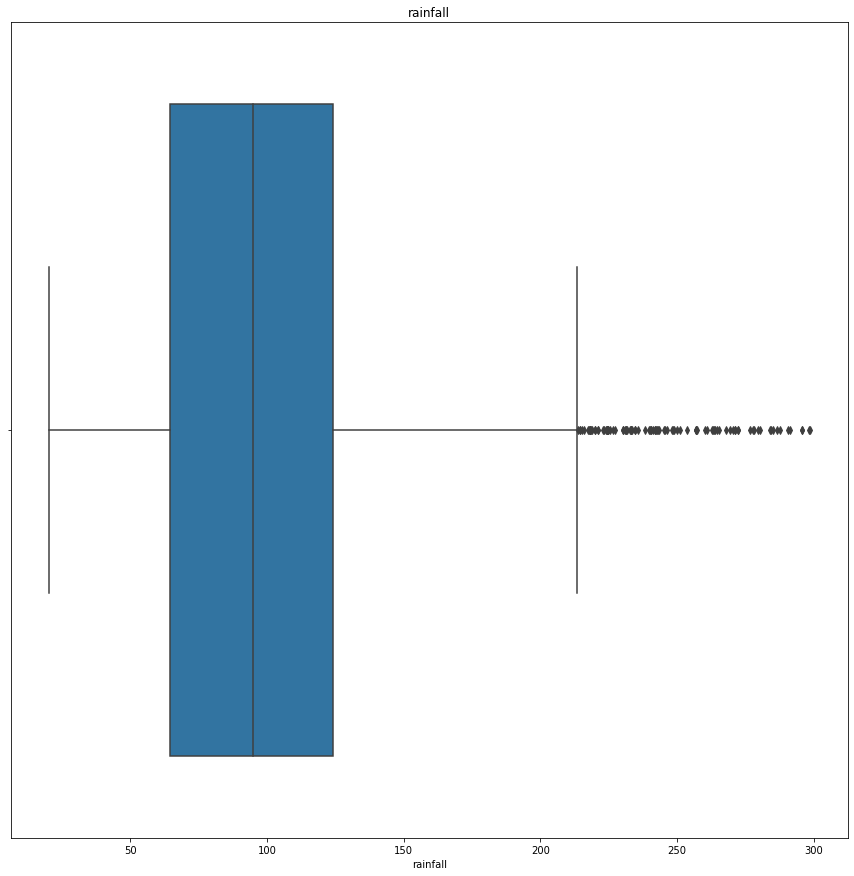

<Figure size 1080x1080 with 0 Axes>

In [31]:
for a in CF:
    data=DF0.copy()
    sns.boxplot(data[a])
    plt.title(a)
    plt.figure(figsize=(15,15))

## **Histogram for Continuous Feautures**

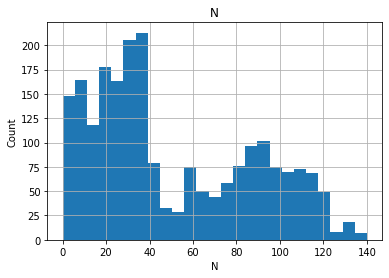

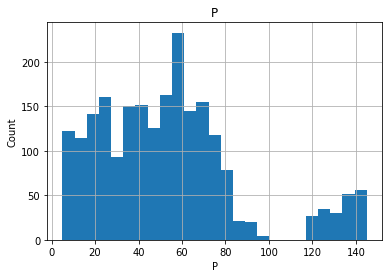

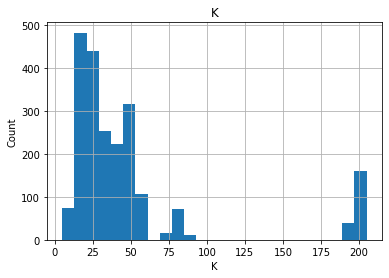

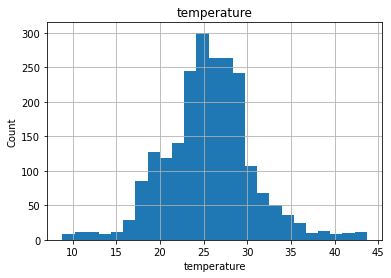

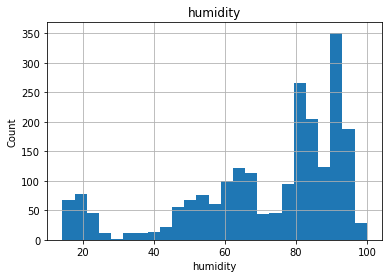

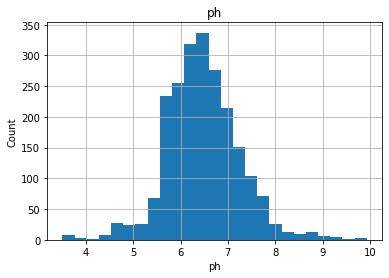

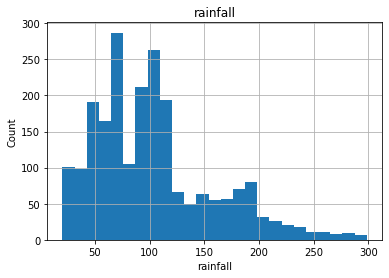

In [32]:
for a in CF:
    data=DF0.copy()
    data[a].hist(bins=25)
    plt.xlabel(a)
    plt.ylabel("Count")
    plt.title(a)
    plt.show()

## **Probability Plot for Continuous Feautures**

N


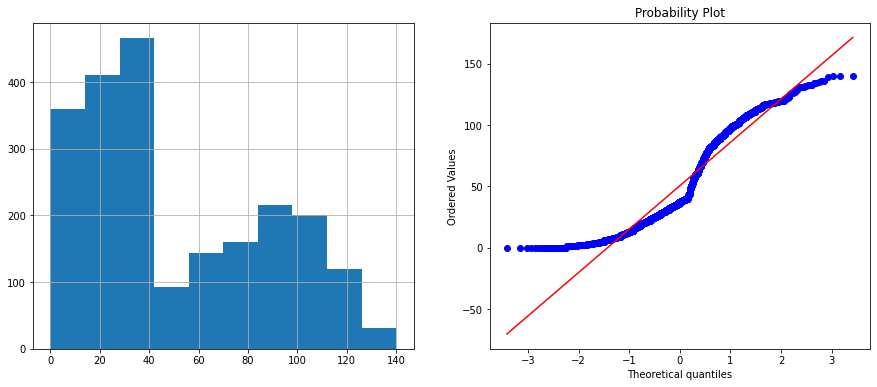

P


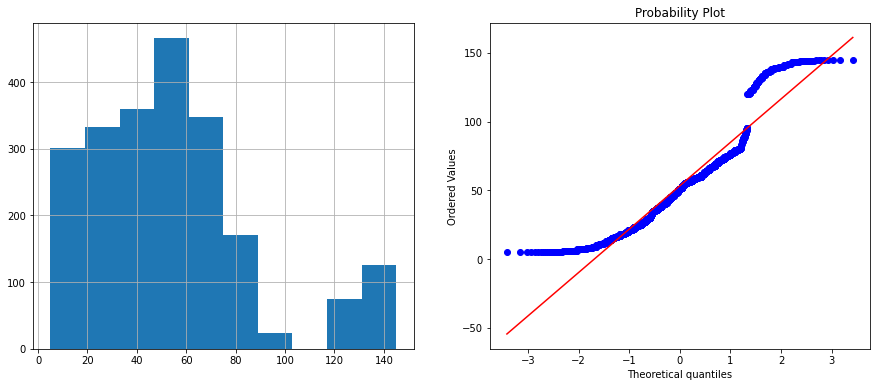

K


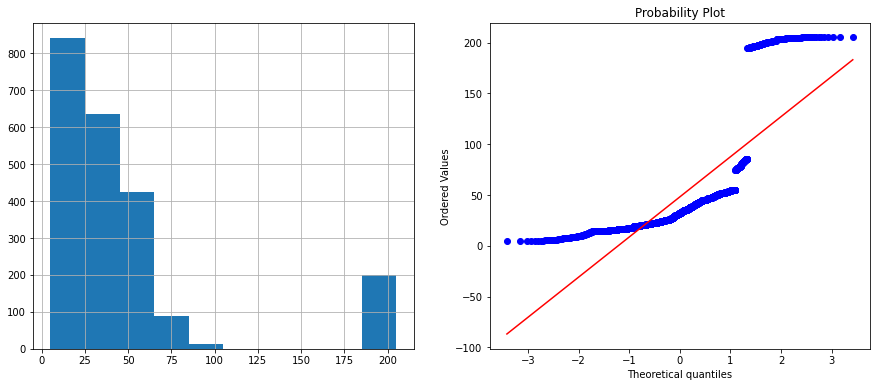

temperature


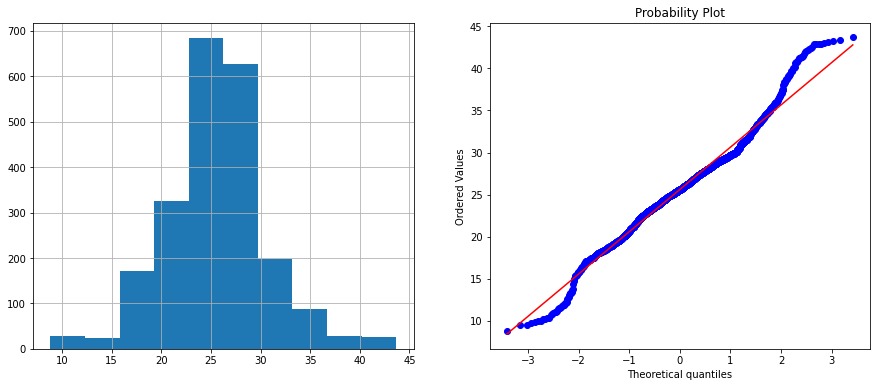

humidity


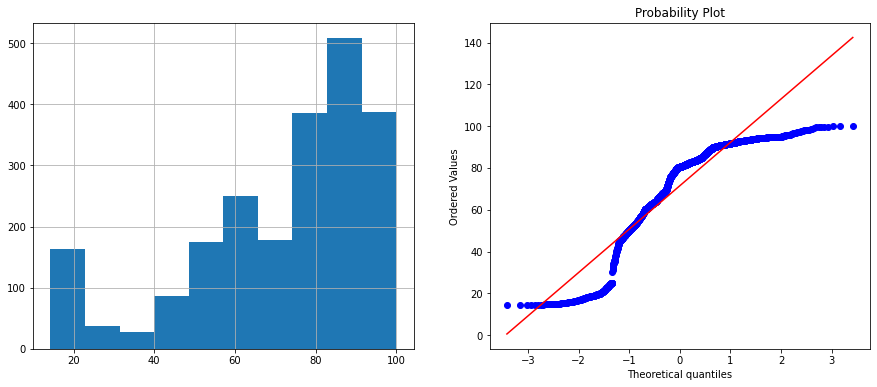

ph


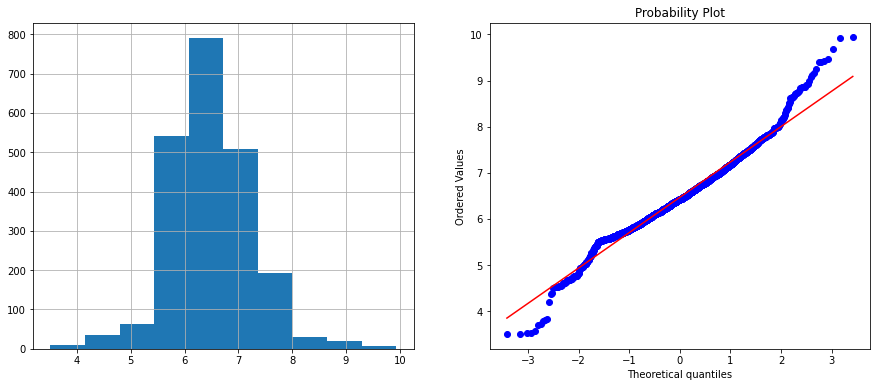

rainfall


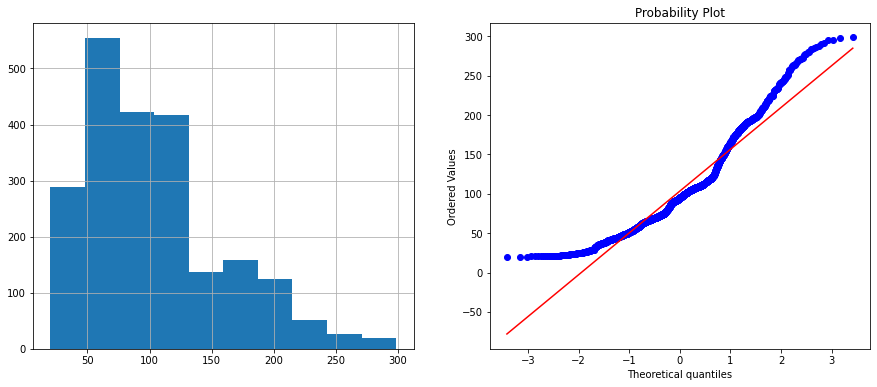

In [33]:
for a in CF:
    print(a)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    DF0[a].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(DF0[a], dist="norm", plot=plt)
    plt.show()

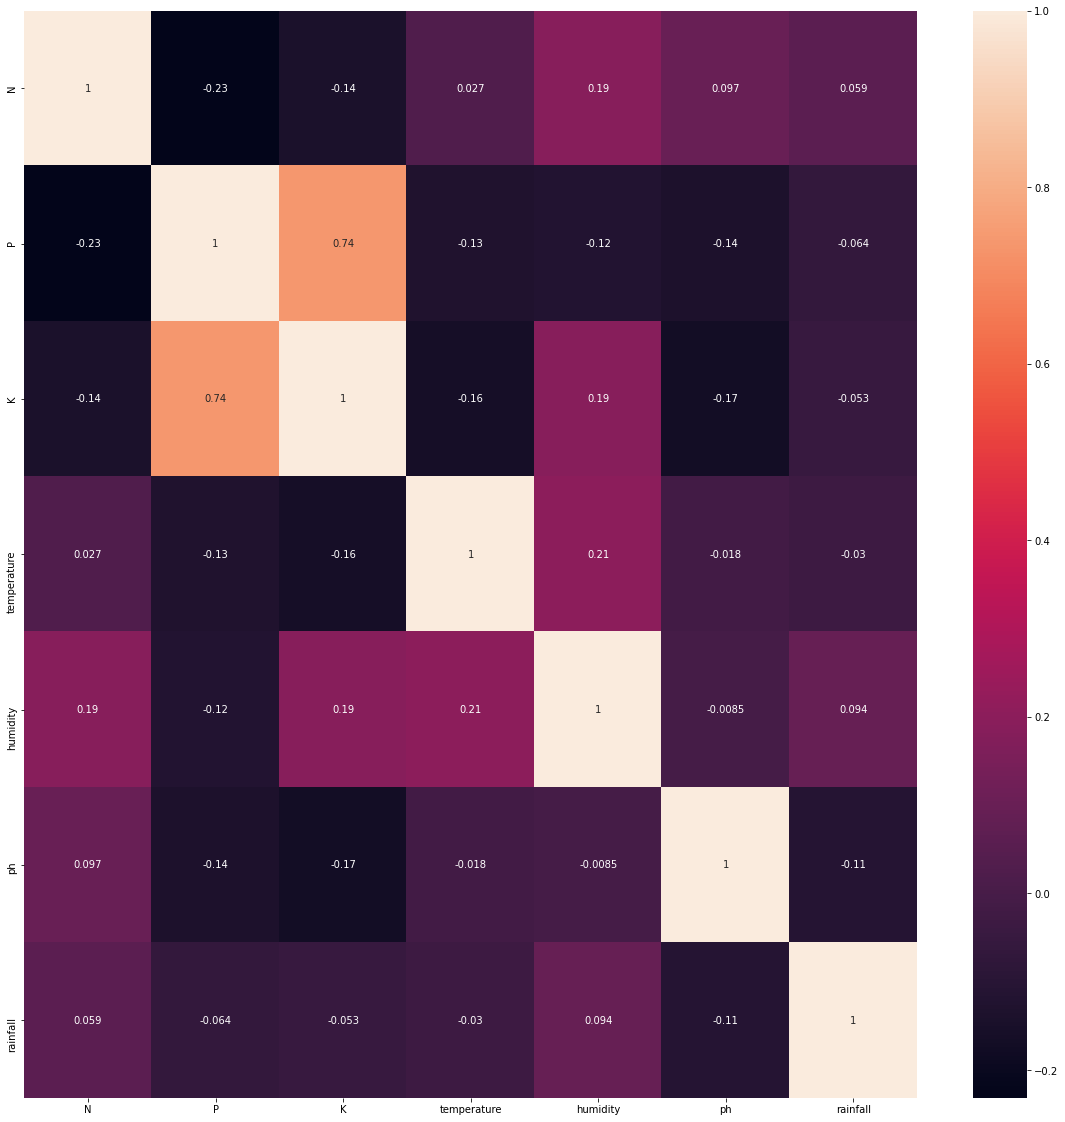

In [34]:
corrmat = DF0.corr(method="pearson")
plt.figure(figsize=(20,20))
b=sns.heatmap(corrmat,annot=True)

## **Probability Plot (qq_Plots)**

In [35]:
def qq_Plots(DF0, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    DF0[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(DF0[variable], dist="norm", plot=plt)
    plt.show()

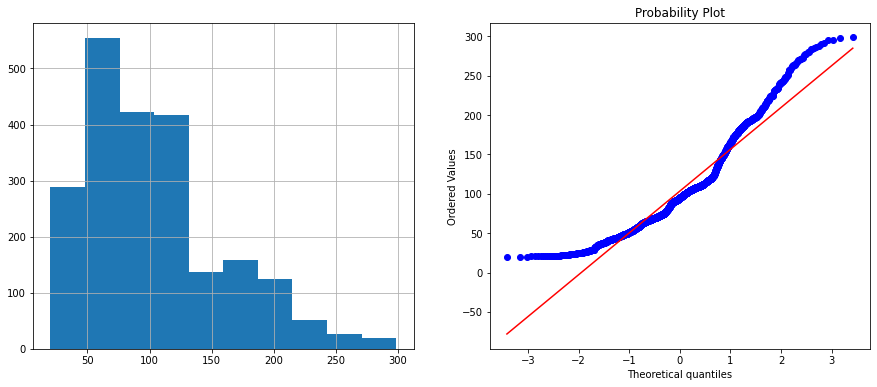

In [36]:
qq_Plots(DF0,"rainfall")

## **Count Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


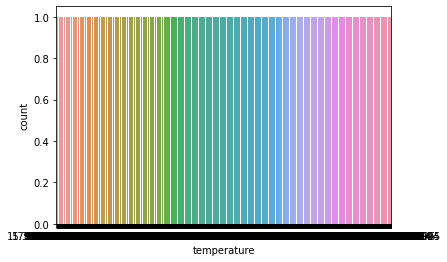

In [37]:
sns.countplot(DF0["temperature"])

## **Splitting Dataset into Test Train**

In [38]:
a = DF0[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Target = DF0['label']
Labels = DF0['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(a, Target, test_size =0.2, random_state = 2)

In [40]:
print(len(X_train))

1760


In [41]:
print(len(X_test))

440


In [42]:
print(len(y_train))

1760


In [43]:
print(len(y_test))

440


In [44]:
print(X_train)

        N    P    K  temperature   humidity        ph    rainfall
1936  113   38   25    22.000851  79.472710  7.388266   90.422242
610    28   35   22    29.530376  86.733460  7.156563   59.872321
372    11   61   21    18.623288  23.024103  5.532101  135.337803
1559   29  139  205    23.641424  93.744615  6.155939  116.691218
1500   24  128  196    22.750888  90.694892  5.521467  110.431786
...   ...  ...  ...          ...        ...       ...         ...
1071  105   88   54    25.787498  84.511942  6.020445  114.200546
433    27   71   23    23.453790  46.487148  7.109598  150.871220
674    23   39   22    29.256493  81.979522  6.864839   42.024833
1099  117   81   53    29.507046  78.205856  5.507642   98.125658
1608   39   24   14    30.554726  90.903438  7.189260  106.071199

[1760 rows x 7 columns]


In [45]:
print(X_test)

        N   P   K  temperature   humidity        ph    rainfall
2121   83  21  28    25.567483  60.492446  7.466901  190.225784
960     1  27  36    23.985988  93.342366  5.684995  104.991282
952    23   5  44    21.207254  94.263047  7.163005  107.566080
1958  116  52  19    22.942767  75.371706  6.114526   67.080226
681     6  37  17    28.086572  80.350059  6.760694   38.144768
...   ...  ..  ..          ...        ...       ...         ...
1684    7  17  10    10.164313  91.223210  6.465913  106.362551
1477   86  18  45    28.965866  90.718329  6.566759   22.258381
851     6  64  23    23.335652  67.404607  7.065264   36.186787
370    37  56  25    22.055923  19.603793  5.774755  126.726537
2010   89  53  44    24.886928  71.917115  7.319735  150.249867

[440 rows x 7 columns]


In [46]:
print(y_train)

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object


In [47]:
print(y_test)

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
1684         orange
1477      muskmelon
851          lentil
370     kidneybeans
2010           jute
Name: label, Length: 440, dtype: object


## **Support Vector Machine (SVM)**

In [48]:
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **DecisionTreeClassifier**

In [49]:
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

## **Logistic Regression**

In [50]:
LR = LogisticRegression(random_state=2)
LR.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **KNeighborsClassifier**

In [51]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## **CatBoost Classifier**

In [52]:
CB = CatBoostClassifier(iterations=3000, eval_metric = "AUC")
CB.fit(X_train, y_train)

Learning rate set to 0.032187
0:	total: 101ms	remaining: 5m 2s
1:	total: 146ms	remaining: 3m 39s
2:	total: 181ms	remaining: 3m 1s
3:	total: 223ms	remaining: 2m 47s
4:	total: 260ms	remaining: 2m 35s
5:	total: 297ms	remaining: 2m 28s
6:	total: 333ms	remaining: 2m 22s
7:	total: 370ms	remaining: 2m 18s
8:	total: 409ms	remaining: 2m 15s
9:	total: 449ms	remaining: 2m 14s
10:	total: 497ms	remaining: 2m 14s
11:	total: 534ms	remaining: 2m 13s
12:	total: 571ms	remaining: 2m 11s
13:	total: 609ms	remaining: 2m 9s
14:	total: 645ms	remaining: 2m 8s
15:	total: 685ms	remaining: 2m 7s
16:	total: 720ms	remaining: 2m 6s
17:	total: 756ms	remaining: 2m 5s
18:	total: 793ms	remaining: 2m 4s
19:	total: 832ms	remaining: 2m 3s
20:	total: 896ms	remaining: 2m 7s
21:	total: 934ms	remaining: 2m 6s
22:	total: 970ms	remaining: 2m 5s
23:	total: 1.03s	remaining: 2m 7s
24:	total: 1.08s	remaining: 2m 8s
25:	total: 1.13s	remaining: 2m 8s
26:	total: 1.17s	remaining: 2m 8s
27:	total: 1.21s	remaining: 2m 8s
28:	total: 1.25s	

## **Gaussian Naive Bayes Classifier**

In [53]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## **XGBoost Classifier**

In [54]:
XGB_C = xgb.XGBClassifier()
XGB_C.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## **RandomForestClassifier**

In [55]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## **Classification Report for all Algorithms**

In [56]:
PRED0 = SVM.predict(X_test)
x = metrics.accuracy_score(y_test,PRED0)
AP.append(x)
MN.append('SVM')
print("SVM Accuracy ==>: ", x)
print(classification_report(y_test,PRED0))

SVM Accuracy ==>:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
PRED1 = DT.predict(X_test)
x = metrics.accuracy_score(y_test,PRED1)
AP.append(x)
MN.append('DT')
print("DT Accuracy ==>", x)
print(classification_report(y_test,PRED1))

DT Accuracy ==> 0.9
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      p

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
PRED2 = LR.predict(X_test)
x = metrics.accuracy_score(y_test,PRED2)
AP.append(x)
MN.append('LR')
print("LR Accuracy ==>: ", x)
print(classification_report(y_test,PRED2))

LR Accuracy ==>:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [59]:
PRED3 = KNN.predict(X_test)
x = metrics.accuracy_score(y_test,PRED3)
AP.append(x)
MN.append('KNN')
print("KNN Accuracy ==>: ", x)
print(classification_report(y_test,PRED3))

KNN Accuracy ==>:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [60]:
PRED4 = CB.predict(X_test)
x = metrics.accuracy_score(y_test,PRED4)
AP.append(x)
MN.append('CB')
print("CB Accuracy ==>", x)
print(classification_report(y_test,PRED4))

CB Accuracy ==> 0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.89      0.94        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00    

In [61]:
PRED5 = GNB.predict(X_test)
x = metrics.accuracy_score(y_test,PRED5)
AP.append(x)
MN.append('GNB')
print("GNB Accuracy ==>: ", x)
print(classification_report(y_test,PRED5))

GNB Accuracy ==>:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [62]:
PRED6 = XGB_C.predict(X_test)
x = metrics.accuracy_score(y_test,PRED6)
AP.append(x)
MN.append('XGB_C')
print("XGB_C Accuracy ==>: ", x)
print(classification_report(y_test,PRED6))

XGB_C Accuracy ==>:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.93      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.

In [63]:
PRED7 = RF.predict(X_test)
x = metrics.accuracy_score(y_test,PRED7)
AP.append(x)
MN.append('RF')
print("RF Accuracy ==>: ", x)
print(classification_report(y_test,PRED7))

RF Accuracy ==>:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [64]:
O = cross_val_score(SVM,a,Target,cv=5)
O

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [65]:
O = cross_val_score(DT,a,Target,cv=5)
O

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [66]:
O = cross_val_score(LR,a,Target,cv=5)
O

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [67]:
O = cross_val_score(KNN,a,Target,cv=5)
O

array([0.97954545, 0.975     , 0.98181818, 0.99090909, 0.98181818])

In [68]:
O = cross_val_score(GNB,a,Target,cv=5)
O

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [69]:
O = cross_val_score(XGB_C,a,Target,cv=5)
O

array([0.98636364, 0.99318182, 0.99545455, 0.99090909, 0.98409091])

In [70]:
O = cross_val_score(RF,a,Target,cv=5)
O

array([0.99772727, 0.99318182, 0.99318182, 0.99545455, 0.99090909])

## **Comparing Accuracies of all Algorithms** 

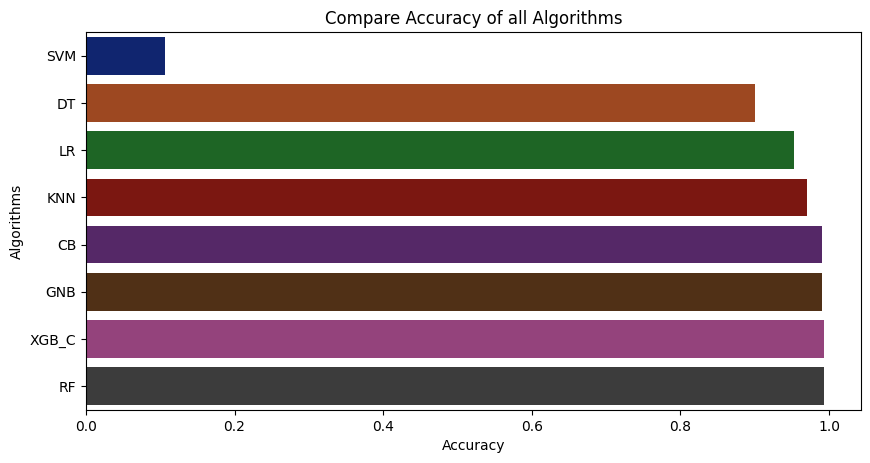

In [71]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Compare Accuracy of all Algorithms')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = AP,y = MN,palette='dark')

In [72]:
AOM = dict(zip(MN, AP))
for i, j in AOM.items():
    print (i,'==>',j)

SVM ==> 0.10681818181818181
DT ==> 0.9
LR ==> 0.9522727272727273
KNN ==> 0.9704545454545455
CB ==> 0.990909090909091
GNB ==> 0.990909090909091
XGB_C ==> 0.9931818181818182
RF ==> 0.9931818181818182


In [73]:
q = np.array([[123,16, 60, 34.987654, 40.8, 7.7, 160.97]])

In [74]:
PRED00 = RF.predict(q)
print(PRED00)

['coffee']


In [83]:
w = np.array([[429,16, 20, 12.76, 20.8, 6.45, 800.97]])

In [84]:
PERD000 = RF.predict(w)

In [85]:
print(PERD000)

['coffee']
